In [15]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [16]:
%matplotlib inline

In [17]:
con_dist = pd.read_csv("condom_dist_u.csv", index_col = "Community Area Name")
mchla = pd.read_csv("chlamydia_males.csv", index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [18]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area
con_dist_group.dropna(inplace = True) #get rid of all blank rows
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) #rename # of condom centers column to be more clear
con_dist_group.head(5)

,Number_of_Condom_Centers
Community Area Name,
Archer Heights,1
Auburn Gresham,2
Austin,8
Belmont Cragin,2
Beverly,1


In [19]:
con_mchla_merged = con_dist_group.join(mchla) #merge condom distribution centers and male chlamydia datasets
con_mchla_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_mchla_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_mchla_merged

,Number_of_Condom_Centers,Community Area,CASES 2000 Male 15-44,Incidence Rate 2000,Incidence Rate 2000 Lower CI,Incidence Rate 2000 Upper CI,CASES 2001 Male 15-44,Incidence Rate 2001,Incidence Rate 2001 Lower CI,Incidence Rate 2001 Upper CI,...,Incidence Rate 2012 Upper CI,CASES 2013 Male 15-44,Incidence_Rate_2013,Incidence Rate 2013 Lower CI,Incidence Rate 2013 Upper CI,CASES 2014 Male 15-44,Incidence_Rate_2014,Incidence Rate 2014 Lower CI,Incidence Rate 2014 Upper CI,WARNING
Community Area Name,,,,,,,,,,,,,,,,,,,,,
Archer Heights,1,57.0,5.0,163.5,53.1,381.6,NaN,NaN,NaN,NaN,...,479.2,15.0,455.9,255.2,751.9,17.0,516.7,301.0,827.3,Rate and confidence interval estimates for yea...
Auburn Gresham,2,71.0,116.0,1147.6,938.8,1356.4,193.0,1945.0,1670.6,2219.4,...,3301.0,256.0,3101.2,2721.3,3481.1,197.0,2386.4,2053.2,2719.6,NaN
Austin,8,25.0,302.0,1306.1,1158.8,1453.4,450.0,1983.1,1799.9,2166.3,...,3586.4,514.0,2730.8,2494.7,2966.9,529.0,2810.5,2571.0,3050.0,NaN
Belmont Cragin,2,19.0,35.0,178.7,124.5,248.5,42.0,214.9,154.9,290.5,...,703.9,105.0,547.8,443.0,652.6,119.0,620.8,509.3,732.3,NaN
Beverly,1,72.0,12.0,289.7,149.7,506.0,17.0,417.8,243.4,668.9,...,1800.4,24.0,704.2,451.2,1047.8,31.0,909.6,618.0,1291.1,Rate and confidence interval estimates for yea...
Brighton Park,2,58.0,13.0,108.8,57.9,186.1,23.0,193.3,122.5,290.0,...,579.3,56.0,492.2,371.8,639.2,69.0,606.4,471.8,767.4,Rate and confidence interval estimates for yea...
Calumet Heights,2,48.0,37.0,1352.3,952.1,1864.0,31.0,1157.1,786.2,1642.4,...,2564.4,36.0,1659.8,1162.5,2297.9,47.0,2166.9,1592.2,2881.5,NaN
Chatham,3,44.0,75.0,1169.5,919.9,1466.0,98.0,1559.5,1266.1,1900.5,...,2997.3,144.0,2813.0,2353.5,3272.5,139.0,2715.4,2264.0,3166.8,NaN
Chicago Lawn,1,66.0,100.0,712.0,572.4,851.6,140.0,1008.6,841.5,1175.7,...,2203.4,190.0,1530.4,1312.8,1748.0,215.0,1731.8,1500.3,1963.3,NaN


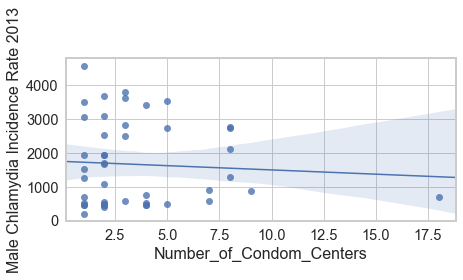

In [20]:
sns.set_style("whitegrid", rc={'axes.linewidth': 2}) #create graph space with seaborn
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 1, "figure.figsize" : (7, 3)}) #set up line width and figure size
graph9 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2013", data = con_mchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph9.set_ylabel("Male Chlamydia Incidence Rate 2013") #fix y axis label

In [22]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                 -0.018
Method:                  Least Squares   F-statistic:                    0.1863
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.668
Time:                         20:17:12   Log-Likelihood:                -392.32
No. Observations:                   46   AIC:                             788.6
Df Residuals:                       44   BIC:                             792.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1748.3863    276.913      6.314      0.000    1190.305    2306.468
Number_of_Condom_Centers   -25.3066     58.634     -0.432      0.668    -143.475      92.862
==============================================================================
Omnibus:                        7.725   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                4.427
Skew:                           0.568   Prob(JB):                        0.109
Kurtosis:                       1.990   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

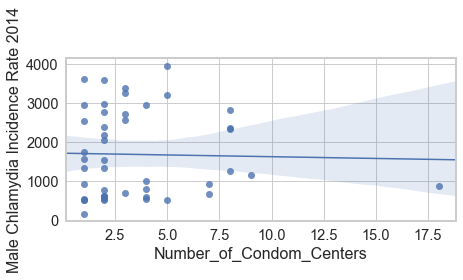

In [14]:
graph10 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2014", data = con_mchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph10.set_ylabel("Male Chlamydia Incidence Rate 2014") #fix y axis label

In [23]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_mchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.022
Method:                  Least Squares   F-statistic:                   0.02935
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.865
Time:                         20:17:30   Log-Likelihood:                -387.11
No. Observations:                   46   AIC:                             778.2
Df Residuals:                       44   BIC:                             781.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1708.8418    247.255      6.911      0.000    1210.532    2207.152
Number_of_Condom_Centers    -8.9693     52.354     -0.171      0.865    -114.482      96.543
==============================================================================
Omnibus:                       13.168   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.251
Skew:                           0.421   Prob(JB):                        0.119
Kurtosis:                       1.772   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""